<a href="https://colab.research.google.com/github/dhshah1112/CMPE_255_Assignment_6/blob/main/CMPE255_Assignment6_E.ipynb" target="_parent">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


In [ ]:
pip install pyOd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyOd: filename=pyod-1.1.2-py3-none-any.whl size=190289 sha256=ddb91e213d5e5e34d72c7dca149663ea9532320e9fa9192b06a86a2305ff13e9
  Stored in directory: /root/.cache/pip/wheels/81/1b/61/aa85b78c3c0c8871f4231e3f4a03bb23cecb7db829498380ee
Successfully built pyOd


First few rows of the dataset:
   Time     Value  Anomaly
0   0.0  0.882026    False
1   0.1  0.299912    False
2   0.2  0.688038    False
3   0.3  1.415967    False
4   0.4  1.323197    False

First few rows with anomaly predictions:
   Time     Value  Anomaly  Predicted_Anomaly
0   0.0  0.882026    False                  0
1   0.1  0.299912    False                  0
2   0.2  0.688038    False                  0
3   0.3  1.415967    False                  0
4   0.4  1.323197    False                  0


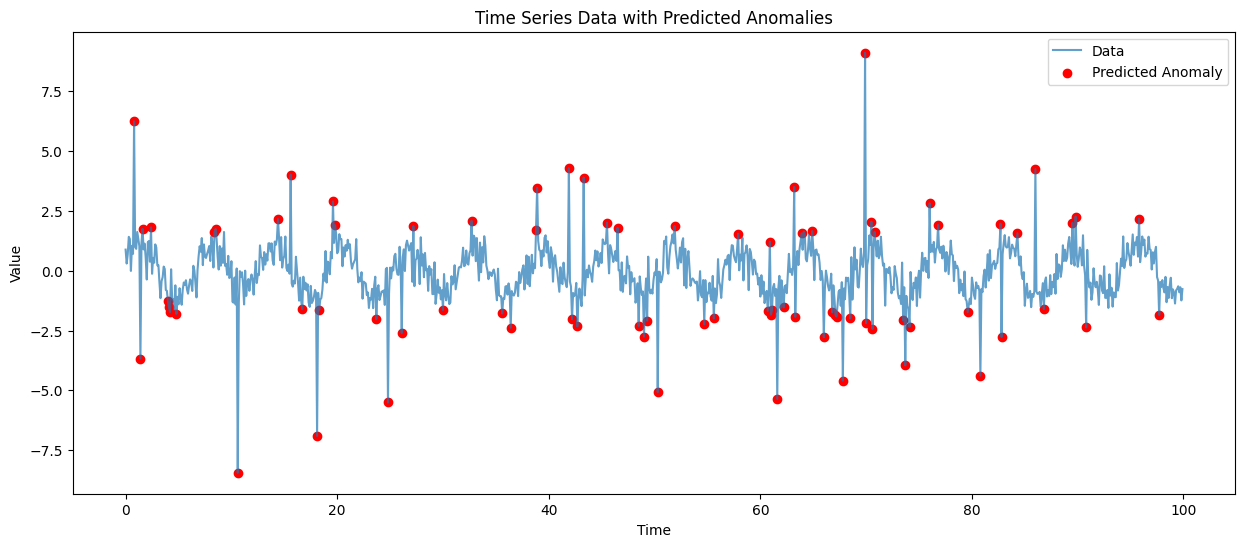


Classification Report:
              precision    recall  f1-score   support

       False       0.98      0.95      0.96       945
        True       0.42      0.62      0.50        55

    accuracy                           0.93      1000
   macro avg       0.70      0.78      0.73      1000
weighted avg       0.95      0.93      0.94      1000



In [ ]:
# Anomaly Detection using PyOD's KNN Algorithm

# Import necessary libraries
import pandas as pd
from pyod.models.knn import KNN
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/CMPE255_Assignment6/E/anomaly_detection_dataset.csv')

# Exploring the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Creating the KNN model for anomaly detection
# KNN is chosen for its simplicity and effectiveness in detecting outliers in data
knn = KNN()

# Fitting the model on the 'Value' column
# The 'Value' column contains the data points of our time series
knn.fit(df[['Value']])

# Predicting anomalies in the dataset
# The model will label each point as 1 (anomaly) or 0 (normal)
outlier_predictions = knn.predict(df[['Value']])

# Adding the predictions to the dataframe
df['Predicted_Anomaly'] = outlier_predictions

# Displaying the first few rows with predictions
print("\nFirst few rows with anomaly predictions:")
print(df.head())

# Visualizing the data with predicted anomalies
plt.figure(figsize=(15, 6))
plt.plot(df['Time'], df['Value'], label='Data', alpha=0.7)
plt.scatter(df['Time'][df['Predicted_Anomaly'] == 1], df['Value'][df['Predicted_Anomaly'] == 1], color='red', label='Predicted Anomaly')
plt.title('Time Series Data with Predicted Anomalies')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

# Quantitative Analysis
# Comparing predicted anomalies with actual anomalies to evaluate the model's performance
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(df['Anomaly'], df['Predicted_Anomaly']))
